**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import toolz as tz

**1**. (10 points)

Write a function `pdsist(xs)` which returns a matrix of the pairwise distance between the collection of vectors in `xs` using Euclidean distance.

Recall that Euclidean distance between two vectors $x$ and $y$ is

$$
d(x, y) = \sqrt{\sum{(y-x)^2}}
$$ 

Find the square distance matrix for
```python
xs = np.array([[0.20981496, 0.54777461, 0.9398527 ],
       [0.63149939, 0.935947  , 0.29834026],
       [0.46302941, 0.25515557, 0.0698739 ],
       [0.38192644, 0.42378508, 0.26055664],
       [0.46307302, 0.05943961, 0.60204931]])
```

Do this **without** using any for loops.

In [2]:
xs = np.array([[0.20981496, 0.54777461, 0.9398527 ],
       [0.63149939, 0.935947  , 0.29834026],
       [0.46302941, 0.25515557, 0.0698739 ],
       [0.38192644, 0.42378508, 0.26055664],
       [0.46307302, 0.05943961, 0.60204931]])

In [3]:
xs

array([[ 0.20981496,  0.54777461,  0.9398527 ],
       [ 0.63149939,  0.935947  ,  0.29834026],
       [ 0.46302941,  0.25515557,  0.0698739 ],
       [ 0.38192644,  0.42378508,  0.26055664],
       [ 0.46307302,  0.05943961,  0.60204931]])

method 1

In [4]:
def pdsist(xs):
    """ function to calculate pairwise distance"""
    res=np.sum((xs[np.newaxis,:,:] - xs[:, np.newaxis])**2, -1)**0.5
    return res

In [5]:
pdsist(xs)

array([[ 0.        ,  0.86025216,  0.9521589 ,  0.71164521,  0.64553997],
       [ 0.86025216,  0.        ,  0.73760151,  0.57098519,  0.9428    ],
       [ 0.9521589 ,  0.73760151,  0.        ,  0.26715821,  0.56702329],
       [ 0.71164521,  0.57098519,  0.26715821,  0.        ,  0.50591465],
       [ 0.64553997,  0.9428    ,  0.56702329,  0.50591465,  0.        ]])

method 2

In [6]:
def pdsist(xs):
    return(np.fromfunction(lambda i,j: np.sqrt(np.sum((xs[i]-xs[j])**2,axis=2)), (xs.shape[0],xs.shape[0]), dtype=int))

In [7]:
pdsist(xs)

array([[ 0.        ,  0.86025216,  0.9521589 ,  0.71164521,  0.64553997],
       [ 0.86025216,  0.        ,  0.73760151,  0.57098519,  0.9428    ],
       [ 0.9521589 ,  0.73760151,  0.        ,  0.26715821,  0.56702329],
       [ 0.71164521,  0.57098519,  0.26715821,  0.        ,  0.50591465],
       [ 0.64553997,  0.9428    ,  0.56702329,  0.50591465,  0.        ]])

we may also use sklearn to check the results

In [8]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(xs, xs)

array([[ 0.        ,  0.86025216,  0.9521589 ,  0.71164521,  0.64553997],
       [ 0.86025216,  0.        ,  0.73760151,  0.57098519,  0.9428    ],
       [ 0.9521589 ,  0.73760151,  0.        ,  0.26715821,  0.56702329],
       [ 0.71164521,  0.57098519,  0.26715821,  0.        ,  0.50591465],
       [ 0.64553997,  0.9428    ,  0.56702329,  0.50591465,  0.        ]])

**2**. (20 points)

Wikipedia gives this algorithm for finding prime numbers

To find all the prime numbers less than or equal to a given integer n by Eratosthenes' method:

- Create a list of consecutive integers from 2 through n: (2, 3, 4, ..., n).
- Initially, let p equal 2, the smallest prime number.
- Enumerate the multiples of p by counting to n from 2p in increments of p, and mark them in the list (these will be 2p, 3p, 4p, ...; the p itself should not be marked).
- Find the first number greater than p in the list that is not marked. If there was no such number, stop. Otherwise, let p now equal this new number (which is the next prime), and repeat from step 3.
- When the algorithm terminates, the numbers remaining not marked in the list are all the primes below n.

Find all primes less than 1,000 using this method.

- You may use `numpy` and do not have to follow the algorithm exactly if you can achieve the same results.

In [9]:
import math
def find_prime(num):
    """function for generating a list of primes that no larger than num"""
    p=2
    num=num+2
    primes=[]
    start=np.zeros(num)
    start[0:3]=1
    while p<=num-2:
        n=math.floor((num-2)/p)
        for i in range(1,n+1):
            start[i*p]=1
        temp=np.where(start==0)[0]
        if len(temp[np.where(temp>p)[0]]):
            primes.append(p) 
            p=min(temp[np.where(temp>p)[0]])
            #print(p)
    res=[i for i in primes if i<(num-2)]
    return(res)

In [10]:
primes=find_prime(1000)
print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


In [11]:
len(primes)

168

**3**. (20 points)

- Load the `iris` data set from R into a `pandas` DataFrame and create a new DataFrame `iris_scaled` where each feature (column) has zero mean and unit standard deviation (5)
- Calculate a pairwise distance matrix (using Euclidean distance) of the normalized features for each flower using the function you wrote in **1** (5)
- Using `seaborn`, plot a `clustermap` of the original `iris` data, with row color labels for the Species (5)
![clustermap](figs/iris_clustermap.png) 
- Using a single `seaborn` function, make a 2 by 2 grid of boxplots for each feature to compare across iris species. The y-axis scale need not be the same across subplots. (5)
![boxplots](figs/iris_boxplots.png)

## 1

Load the iris data set from R into a pandas DataFrame and create a new DataFrame iris_scaled where each feature (column) has zero mean and unit standard deviation

In [12]:
%load_ext rpy2.ipython

In [13]:
%%R -o iris
head(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


In [14]:
iris=pd.DataFrame(iris)

In [15]:
iris_scaled=iris
for i in range(4):
    iris_scaled[iris.keys()[i]]=(iris_scaled[iris.keys()[i]]-iris_scaled[iris.keys()[i]].mean())/iris_scaled[iris.keys()[i]].std()

In [16]:
iris_scaled.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,-0.897674,1.015602,-1.335752,-1.311052,setosa
2,-1.139200,-0.131539,-1.335752,-1.311052,setosa
3,-1.380727,0.327318,-1.392399,-1.311052,setosa
4,-1.501490,0.097889,-1.279104,-1.311052,setosa
5,-1.018437,1.245030,-1.335752,-1.311052,setosa


In [20]:
for i in range(4):
    print(iris.keys()[i],'has mean value:',iris_scaled[iris.keys()[i]].mean())

Sepal.Length has mean value: -5.68434188608e-16
Sepal.Width has mean value: -7.81597009336e-16
Petal.Length has mean value: -2.84217094304e-16
Petal.Width has mean value: -3.78956125739e-16


In [21]:
for i in range(4):
    print(iris.keys()[i],'has standard deviation value:',iris_scaled[iris.keys()[i]].std())

Sepal.Length has standard deviation value: 1.0
Sepal.Width has standard deviation value: 1.0
Petal.Length has standard deviation value: 1.0
Petal.Width has standard deviation value: 1.0


## 2

Calculate a pairwise distance matrix (using Euclidean distance) of the normalized features for each flower using the function you wrote in **1** (5)

In [22]:
iris.Species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

In [24]:
iris_scaled.loc[iris_scaled.Species=='setosa'][iris_scaled.keys()[0:4]]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,-0.897674,1.015602,-1.335752,-1.311052
2,-1.139200,-0.131539,-1.335752,-1.311052
3,-1.380727,0.327318,-1.392399,-1.311052
4,-1.501490,0.097889,-1.279104,-1.311052
5,-1.018437,1.245030,-1.335752,-1.311052
6,-0.535384,1.933315,-1.165809,-1.048667
7,-1.501490,0.786174,-1.335752,-1.179859
8,-1.018437,0.786174,-1.279104,-1.311052
9,-1.743017,-0.360967,-1.335752,-1.311052
10,-1.139200,0.097889,-1.279104,-1.442245


In [25]:
pdsist(
np.array(iris_scaled.loc[iris_scaled.Species=='setosa'][iris_scaled.keys()[0:4]])
)

array([[ 0.        ,  1.1722914 ,  0.84278401, ...,  0.91560357,
         0.52162552,  0.47448172],
       [ 1.1722914 ,  0.        ,  0.52162552, ...,  0.58463929,
         1.67802745,  0.69879847],
       [ 0.84278401,  0.52162552,  0.        , ...,  0.1333894 ,
         1.36153728,  0.43255082],
       ..., 
       [ 0.91560357,  0.58463929,  0.1333894 , ...,  0.        ,
         1.42609465,  0.53476881],
       [ 0.52162552,  1.67802745,  1.36153728, ...,  1.42609465,
         0.        ,  0.98826081],
       [ 0.47448172,  0.69879847,  0.43255082, ...,  0.53476881,
         0.98826081,  0.        ]])

In [26]:
pdsist(
np.array(iris_scaled.loc[iris_scaled.Species=='virginica'][iris_scaled.keys()[0:4]])
)

array([[ 0.        ,  1.77174395,  1.2983414 , ...,  1.0806164 ,
         0.50158704,  1.34549835],
       [ 1.77174395,  0.        ,  1.7923763 , ...,  1.09943667,
         1.7654552 ,  0.71100691],
       [ 1.2983414 ,  1.7923763 ,  0.        , ...,  0.83634101,
         1.47395803,  1.56854726],
       ..., 
       [ 1.0806164 ,  1.09943667,  0.83634101, ...,  0.        ,
         1.06826493,  0.77270365],
       [ 0.50158704,  1.7654552 ,  1.47395803, ...,  1.06826493,
         0.        ,  1.19692065],
       [ 1.34549835,  0.71100691,  1.56854726, ...,  0.77270365,
         1.19692065,  0.        ]])

In [27]:
pdsist(
np.array(iris_scaled.loc[iris_scaled.Species=='versicolor'][iris_scaled.keys()[0:4]])
)

array([[ 0.        ,  0.74502567,  0.31187882, ...,  1.21476416,
         2.987685  ,  1.85461275],
       [ 0.74502567,  0.        ,  0.68452536, ...,  0.78342359,
         2.45790241,  1.29498682],
       [ 0.31187882,  0.68452536,  0.        , ...,  1.05333879,
         2.83793989,  1.68760731],
       ..., 
       [ 1.21476416,  0.78342359,  1.05333879, ...,  0.        ,
         1.79387653,  0.65579531],
       [ 2.987685  ,  2.45790241,  2.83793989, ...,  1.79387653,
         0.        ,  1.20659904],
       [ 1.85461275,  1.29498682,  1.68760731, ...,  0.65579531,
         1.20659904,  0.        ]])

## 3

Using `seaborn`, plot a `clustermap` of the original `iris` data, with row color labels for the Species (5)

In [27]:
import seaborn as sns; sns.set(color_codes=True)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,-0.900681,1.019004,-1.340227,-1.315444,setosa
2,-1.143017,-0.131979,-1.340227,-1.315444,setosa
3,-1.385353,0.328414,-1.397064,-1.315444,setosa
4,-1.506521,0.098217,-1.283389,-1.315444,setosa
5,-1.021849,1.249201,-1.340227,-1.315444,setosa


In [28]:
iris2=iris

In [29]:
species = iris2.pop("Species")

draw with iris in seaborn

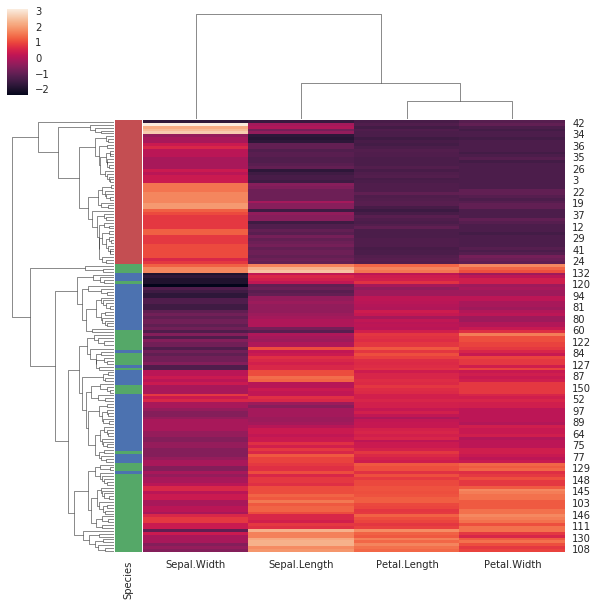

In [30]:
lut = dict(zip(species.unique(), "rbg"))
row_colors = species.map(lut)
g = sns.clustermap(iris2, row_colors=row_colors)

draw with iris in R

In [30]:
%%R -o iris
head(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


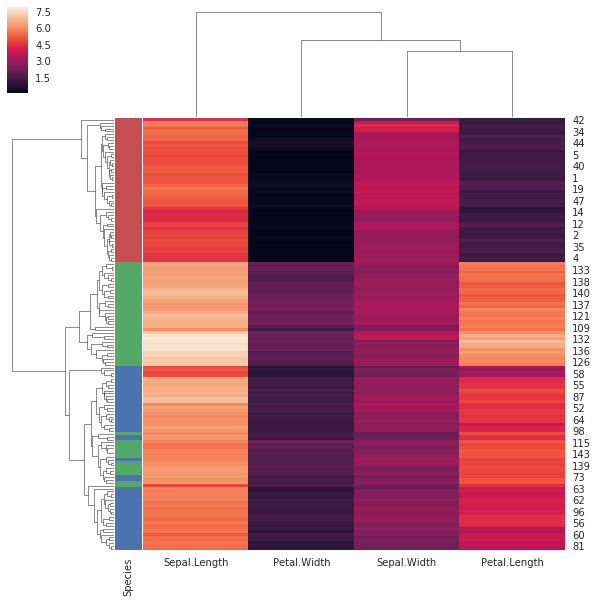

In [31]:
color = dict(zip(iris['Species'].unique(), "rbg"))
row_colors = iris['Species'].map(color)
g = sns.clustermap(iris.iloc[:,0:4], row_colors=row_colors)
pass

### 4

Using a single seaborn function, make a 2 by 2 grid of boxplots for each feature to compare across iris species. The y-axis scale need not be the same across subplots. (5)

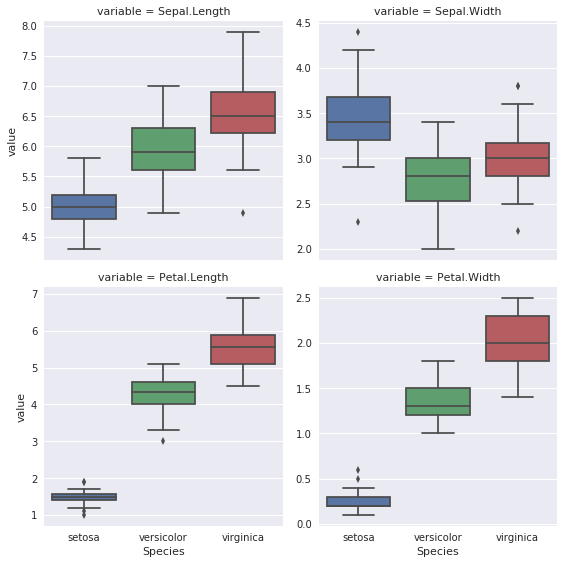

In [32]:
g = sns.factorplot(x='Species', y='value', col = 'variable',
                   col_wrap=2, sharey=False,
                   data=pd.melt(iris,id_vars=['Species']), 
                   kind='box')

**4**. (50 points)

This is an example of the messiness of real-life data munging, using a (truncated and randomized) data set provided by an HIV researcher. In this data set, HIV-positive subjects were tested for sexually transmitted infections (STI) at each visit (and treated if they were positive). 

You will probably need to review the `pandas` documentation and examples carefully to complete this exercise.

The file 'hiv.csv' contains data the HIV subjects. The variables are

- PID: A randomly generated patient ID
- Race: The race of the subject as a single letter code
- Age: The age of the subject at study entry
- Visit Date: Date of visit at which STI data was collected
- STIs: Type of STI detected if any

The Race and Age of each subject are only recorded for the first visit.

Objectives:

- Read the data set into a `pandas` DataFrame (5)
- Fill up the missing Race and Age values (5)
- Reclassify the STIs into one of the following categories ('none', 'syphilis', 'chlamydia', 'gonorrhea', 'HCV',  NaN) by grouping in the obvious way. Note that 'none' means no infection and NaN (np.nan) means missing data. (10)
- FInd the subject(s) with the most number of visits (how many are there?) (5)
- Perform a chi-square test to see if an STI at the **first** visit is associated with the risk of an STI at **any** subsequent visit. You only need to do this for subjects who have more than 1 visit. You can use `from scipy.stats import chi2_contingency` to do the $\chi^2$ test. (20)

### Q1 Read the data set into a pandas DataFrame (5)

In [3]:
import pandas as pd
hiv=pd.read_csv('data/hiv.csv',index_col=0)
hiv.head()

FileNotFoundError: File b'data/hiv.csv' does not exist

### Q2 Fill up the missing Race and Age values (5)

In [143]:
hiv2=hiv.fillna(method='ffill')

In [144]:
hiv2.STIs=hiv.STIs

In [145]:
hiv2.head()

,PID,Race,Age,Visit Date,STIs
0,9933,W,61.0,2013-12-24,none
1,9933,W,61.0,2015-07-18,none
2,9933,W,61.0,2016-01-23,none
3,9933,W,61.0,2013-10-14,syphilis
4,9933,W,61.0,2013-12-23,none


In [146]:
print('count of the missing values: Race {}; Age: {}; STIs: {}'.format(pd.isnull(hiv2.Race).sum(),pd.isnull(hiv2.Age).sum(),pd.isnull(hiv2.STIs).sum()))

count of the missing values: Race 0; Age: 0; STIs: 118


In [147]:
pd.isnull(hiv.STIs).sum()

118

#### Q3 Reclassify the STIs into one of the following categories ('none', 'syphilis', 'chlamydia', 'gonorrhea', 'HCV', NaN) by grouping in the obvious way. Note that 'none' means no infection and NaN (np.nan) means missing data. (10)

In [148]:
hiv.STIs.value_counts()

none                       420
syphilis                    27
gonorrhea- vag/urethral     19
chlamydia- rectal           19
chlamydia- vag/urethral     17
gonorrhea- rectal           11
gonorrhea- OP                7
chlamydia- OP                4
HCV                          3
None                         1
Name: STIs, dtype: int64

In [149]:
nans=np.where(pd.isnull(hiv.STIs))[0]
hiv.STIs[nans]='1'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [150]:
a=[hiv.STIs[i].split('-')[0] for i in range(hiv.shape[0])]

In [151]:
hiv2.STIs=a
hiv2.STIs[hiv2.STIs=='None']='none'
hiv2.STIs[nans]=np.nan

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [152]:
hiv2.STIs.value_counts()

none         421
chlamydia     40
gonorrhea     37
syphilis      27
HCV            3
Name: STIs, dtype: int64

In [153]:
hiv2.STIs.isnull().sum()

118

### FInd the subject(s) with the most number of visits (how many are there?) (5)

In [154]:
hiv=pd.read_csv('data/hiv.csv',index_col=0)
hiv3=hiv

change NaN to none

In [155]:
hiv3.STIs[np.where(pd.isnull(hiv3.STIs))[0]]='none'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
hiv3.STIs.isnull().sum()

0

In [156]:
visit=pd.DataFrame(hiv3.groupby('PID').size()).reset_index()
visit.columns=['PID','VISIT']

In [157]:
visit.loc[visit.VISIT==visit.VISIT.max()]

,PID,VISIT
209,9963,16


### chi-square
Perform a chi-square test to see if an STI at the first visit is associated with the risk of an STI at any subsequent visit. You only need to do this for subjects who have more than 1 visit. You can use from scipy.stats import chi2_contingency to do the  χ2χ2  test. (20)

In [158]:
from scipy.stats import chi2_contingency

In [168]:
## the people who have more than one visit
visit1=visit.loc[visit.VISIT.values>1].reset_index(drop=True)
visit1.head()

,PID,VISIT
0,9007,2
1,9010,3
2,9014,4
3,9016,4
4,9023,3


In [173]:
visit1.shape ### the patients who have more the one visits

(144, 2)

In [178]:
hiv4=hiv2.loc[hiv2.PID.isin(visit1.PID)].reset_index(drop=True)

In [179]:
times=hiv4.groupby('PID')['Visit Date'].rank(ascending=True)
hiv4['times']=[math.floor(i) for i in times]

In [181]:
markers=np.zeros(hiv4.shape[0])
markers[hiv4.STIs!='none']=1
hiv4['markers']=markers

In [196]:
total_score=pd.DataFrame(hiv4.groupby(['PID'])['markers'].sum()).reset_index()
total_score.columns=['PID','total_score']
total_score.head(2)

,PID,total_score
0,9007,0.0
1,9010,0.0


In [197]:
total_score.shape

(144, 2)

In [199]:
first_counts=hiv4.loc[hiv4.times==1].reset_index(drop=True)[['PID','markers']]
first_counts.columns=['PID','firsts']
first_counts=pd.DataFrame(first_counts.groupby(['PID'])['firsts'].sum()).reset_index()
first_counts.columns=['PID','firsts']
first_counts.head(2)

,PID,firsts
0,9007,0.0
1,9010,0.0


In [200]:
first_counts.shape

(144, 2)

In [202]:
total_size=pd.DataFrame(hiv4.groupby('PID').size()).reset_index()
total_size.columns=['PID','total_counts']
total_size.head(2)

,PID,total_counts
0,9007,2
1,9010,3


In [203]:
total_size.shape

(144, 2)

In [204]:
summary_table=total_size.merge(total_score,right_on='PID',left_on='PID')
summary_table=summary_table.merge(first_counts,right_on='PID',left_on='PID')
summary_table['subs']=summary_table.total_score.values-summary_table.firsts.values
summary_table.head()

,PID,total_counts,total_score,firsts,subs
0,9007,2,0.0,0.0,0.0
1,9010,3,0.0,0.0,0.0
2,9014,4,1.0,0.0,1.0
3,9016,4,2.0,1.0,1.0
4,9023,3,2.0,0.0,2.0


In [205]:
summary_table.shape

(144, 5)

In [216]:
hiv4.head()

,PID,Race,Age,Visit Date,STIs,times,markers
0,9933,W,61.0,2013-12-24,none,3,0.0
1,9933,W,61.0,2015-07-18,none,5,0.0
2,9933,W,61.0,2016-01-23,none,6,0.0
3,9933,W,61.0,2013-10-14,syphilis,1,1.0
4,9933,W,61.0,2013-12-23,none,2,0.0


In [206]:
## the patients who has an sti at first time and subsequent visit
f1s1=summary_table.loc[(summary_table.subs!=0)&(summary_table.firsts!=0)].shape[0]
## the patients who has an sti at first time and no subsequent visit
f1s0=summary_table.loc[(summary_table.subs==0)&(summary_table.firsts!=0)].shape[0]
## the patients who has no sti at first time and subsequent visit
f0s1=summary_table.loc[(summary_table.subs!=0)&(summary_table.firsts==0)].shape[0]
## the patients who has no sti at first time and no subsequent visit
f0s0=summary_table.loc[(summary_table.subs==0)&(summary_table.firsts==0)].shape[0]

In [207]:
obs=np.array([[f1s1,f1s0],[f0s1,f0s0]])
obs

array([[31, 17],
       [46, 50]])

In [209]:
chi2, p, dof, expected = chi2_contingency(obs)
print(p)

0.086716803854
